### Import packages

In [1]:
import pandas as pd ### for reading and modifying databases
import matplotlib.pyplot as plt ### for plotting graphs
import numpy as np

### Reads files

In [2]:
df = pd.read_csv('data.csv') ### Reads the data file

In [3]:
df.head() ### Preview of datafile

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000,1,0,0,0,0,0,1,5,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40007,140000,0,1,0,0,0,0,0,0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,40008,38000,0,1,0,0,0,0,1,1,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
3,40010,110000,0,1,0,0,0,0,0,0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1
4,40011,120000,0,1,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1


In [13]:
def var_stats (df, var1, var2):
    stat = ['count', 'mean', 'min', 'max', 'median', 'std']
    return df[var1].groupby(df[var2]).agg(stat)

In [15]:
var_stats(df, 'price_000', 'apt')

,count,mean,min,max,median,std
apt,,,,,,
0,1286,123234.505443,20000,740000,105000,76437.634673
1,2690,79301.242751,20000,800000,60000,70805.108636


In [54]:
def stats_description (df, l):
    for i in range (0, len(l)):
        if i == 0:
            table = df[l[i]].describe().to_frame()
        else:
            table[l[i]] = df[l[i]].describe()
    return np.round(table, 2).T

In [55]:
stats_description(df, ['price_000', 'apt','pcn_green'])

,count,mean,std,min,25%,50%,75%,max
price_000,3976.0,93511.05,75516.07,20000.0,50000.00,72000.00,110000.00,800000.0
apt,3976.0,0.68,0.47,0.0,0.00,1.00,1.00,1.0
pcn_green,3976.0,3.37,7.87,0.0,0.32,0.98,3.37,57.0


### Histograms

##### Describes the variable used for plotting the histogram

In [4]:
len(df.pop_dens.unique())

2716

In [5]:
max(df.pop_dens)

986.73

##### Plots the histogram

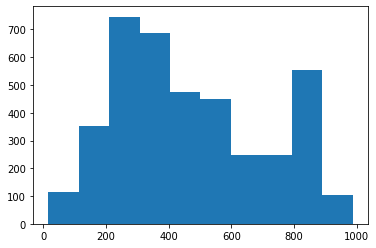

In [6]:
x = df.pop_dens  ### Defines the variable we want to plot
plt.hist(x)
plt.show()

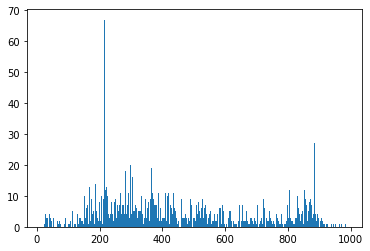

In [7]:
x = df.pop_dens  ### Defines the variable we want to plot
n_bins = int(max(df.pop_dens)) ### Defines the number of bins - we'll use the maximum observed value, for now
plt.hist(x, n_bins) ### Defines the histogram plotting function from the matplotlib library
plt.show() ### Plots the graph

##### Personalizes plot

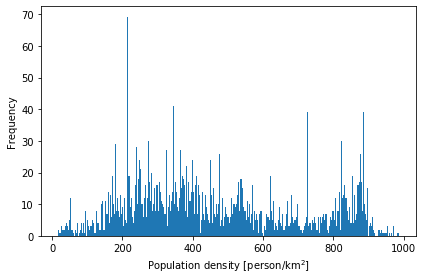

In [57]:
x = df.pop_dens  ### Defines the variable we want to plot
n_bins = 500 ### Defines the number of bins
plt.figure(figsize=(6,4)) ### Defines graph size (x,y) in inches
plt.hist(x, n_bins) ### Defines the histogram plotting function from the matplotlib library
plt.xlabel('Population density [$\mathregular{person/km^2}]$') ### Creates the x-axis label
plt.ylabel('Frequency') ### Creates the y-axis label
plt.tight_layout() ### Adjusts labels to the figure area
plt.savefig('pop_dens_hist.jpg') ### Saves figure to project folder
plt.show() ### Plots the graph

##### Dropping outliers

In [9]:
### Drop observations with population density under 50 and over 900 per sq. mi.
filtered_df = df[(df['pop_dens']>50) & (df['pop_dens']<900)].reset_index(drop = True)
filtered_df.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000,1,0,0,0,0,0,1,5,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40007,140000,0,1,0,0,0,0,0,0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,40011,120000,0,1,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1
3,40012,140000,0,1,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.70,46.00,1,0,11.84940,1
4,40013,170000,0,1,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.73,46.00,1,0,12.04355,1


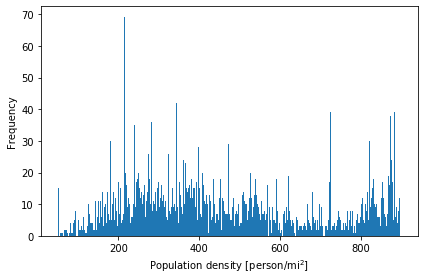

In [10]:
x = filtered_df.pop_dens  ### Defines the variable we want to plot
n_bins = 450 ### Defines the number of bins
plt.figure(figsize=(6,4)) ### Defines graph size (x,y) in inches
plt.hist(x, n_bins) ### Defines the histogram plotting function from the matplotlib library
plt.xlabel('Population density [$\mathregular{person/km^2}]$') ### Creates the x-axis label
plt.ylabel('Frequency') ### Creates the y-axis label
plt.tight_layout() ### Adjusts labels to the figure area
# plt.savefig('pop_dens_hist.jpg') ### Saves figure to project folder
plt.show() ### Plots the graph

##### Creating dummy SES variable

In [11]:
filtered_df.ses.unique()

array([4, 5, 3, 1, 2, 6], dtype=int64)

In [12]:
filtered_df.groupby('ses').size() 

ses
1      24
2      77
3    2035
4    1425
5     223
6      91
dtype: int64

In [13]:
filtered_df['ses_dummy'] = np.where((filtered_df['ses']==5)|(filtered_df['ses']==6), 1, 0)

In [14]:
filtered_df.groupby('ses_dummy').size()

ses_dummy
0    3561
1     314
dtype: int64

##### Create binary density variable

In [15]:
pop_dens_med = np.median(filtered_df.pop_dens)
print(pop_dens_med)

414.27


In [16]:
filtered_df['pop_dens_dummy'] = np.where(filtered_df['pop_dens']>=pop_dens_med, 1, 0)

In [17]:
filtered_df.groupby('pop_dens_dummy').size()

pop_dens_dummy
0    1935
1    1940
dtype: int64

##### Recode the number of bathrooms variable

In [18]:
filtered_df.num_bath.unique()

array([2, 4, 3, 1, 5], dtype=int64)

In [19]:
filtered_df['num_bath_cat'] = filtered_df['num_bath']
filtered_df['num_bath_cat'] = np.where(filtered_df['num_bath']>=4, 3, filtered_df['num_bath_cat'])

In [20]:
filtered_df.groupby('num_bath').size()

num_bath
1    1004
2    1740
3     608
4     415
5     108
dtype: int64

In [21]:
filtered_df.groupby('num_bath_cat').size()

num_bath_cat
1    1004
2    1740
3    1131
dtype: int64

##### Standardizing the Area variable

In [131]:
filtered_df

area_mean = np.mean(filtered_df['area_m2'])
area_SD = np.std(filtered_df['area_m2'])

print('mean:', round(area_mean, 2))
print('SD:', round(area_SD, 2))

mean: 121.05
SD: 85.9


In [49]:
filtered_df['area_stand'] = (filtered_df['area_m2']-area_mean)/area_SD

In [50]:
### Check whether standarization worked
### Mean should be 0 and SD 1
area_std_mean = np.mean(filtered_df['area_stand'])
area_std_SD = np.std(filtered_df['area_stand'])

print('mean:', round(area_std_mean, 2))
print('SD:', round(area_std_SD, 2))

mean: 0.0
SD: 1.0


##### Compare area histograms

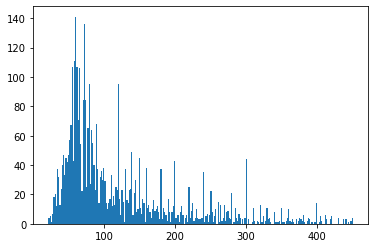

In [25]:
x = data['area_m2']  ### Defines the variable we want to plot
plt.hist(x, 250) ### Defines number of bins
plt.show()

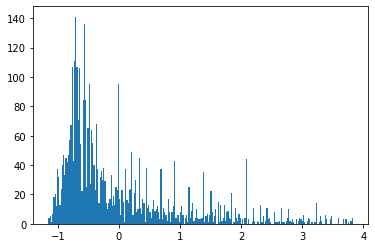

In [26]:
x = data['area_stand']  ### Defines the variable we want to plot
plt.hist(x, 250) ### Defines number of bins
plt.show()

##### Compare density histograms

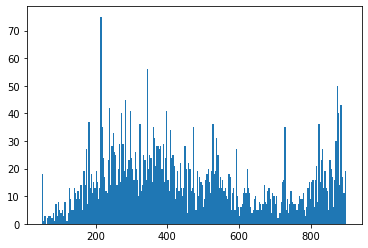

In [51]:
x = data['pop_dens']  ### Defines the variable we want to plot
plt.hist(x, 250) ### Defines number of bins
plt.show()

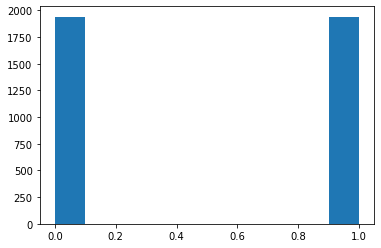

In [56]:
x = data['pop_dens_dummy']  ### Defines the variable we want to plot
plt.hist(x) ### Defines number of bins
plt.show()

##### Scatterplot price vs SES (6 categories)

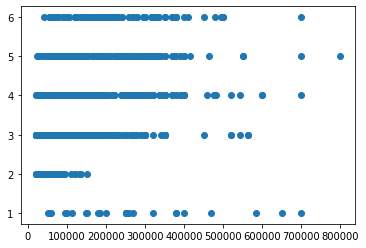

In [27]:
x = filtered_df.price_000 ### Defines x varible
y = filtered_df.ses ### Defines y variable
plt.scatter(x, y) ### Creates scatterplot
plt.scatter
plt.show()

##### Scatterplot price vs SES (dummy)

In [58]:
x = filtered_df.price_000
y = filtered_df.ses_dummy
plt.scatter(x, y)
plt.axes.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

NameError: name 'filtered_df' is not defined

### Appendix

##### How to plot side by side

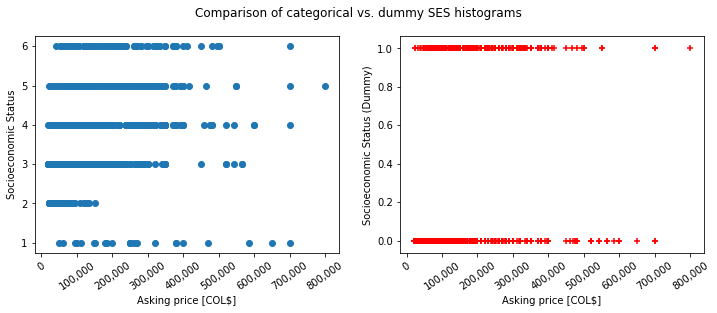

In [159]:
### Defines the number of figures that will make up the graph
### plt.subplots (n_rows, n_columns, figsize = (width, height))
### In this case, we are creating two figures side by side (1, 2)
### If we wanted two figures one on top of the other, we would do (2, 1)

### ax1 will define everything related to figure 1
### ax2 will define everything related to figure 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

### Defines the varibles that will be used for each plot
### Figure 1
x1 = filtered_df.price_000
y1 = filtered_df.ses
### Figure 2
x2 = filtered_df.price_000
y2 = filtered_df.ses_dummy

### Creates title for overall figure
plt.suptitle('Comparison of categorical vs. dummy SES histograms')

### Creates first plot
ax1.scatter(x1, y1)
ax1.set_xlabel('Asking price [COL$]')
ax1.set_ylabel('Socioeconomic Status')
### Formats y-axis number to zero decimal points
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y1, loc: "{:d}".format(int(y1))))
### Formats x-axis number to include thousands separator
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x1, loc: "{:,}".format(int(x1))))
ax1.tick_params(axis='x', labelrotation=35)### Let's rotate the labels!

### Creates second plot
ax2.scatter(x2, y2, c ='red', marker = '+') ### We can change the color and marker type
ax2.set_xlabel('Asking price [COL$]')
ax2.set_ylabel('Socioeconomic Status (Dummy)')

### Formats x-axis number to include thousands separator
ax2.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x2, loc: "{:,}".format(int(x2))))
ax2.tick_params(axis='x', labelrotation=35) ### Let's rotate the labels!

plt.show()